## Machine Learning - ML_EX9  - Face Recognition
Submitted by: 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
import scipy
from numpy import linalg as LA
from sklearn.svm import SVC

## AT&T Faces DataBase Taken From:

c

### The DataBase consists with :
400 grayscale faces images (112x92 pixels each) of 40 different people (10 images of each person). 

- **The aim of this project is to learn a classifier to identify each of the 40 people in the database.**

Note, that the number of features here (d=112x92=10,304) is *much higher* than the number of examples (n=400). 
In order to avoid significant overfitting of the model, we will try to reduce the number of features (using PCA) before we fit the classifier. 

### First Stage - Loading and ploting the dataset

1. load the database
2. plot all the images as a single plot ( describe the image for understanding)

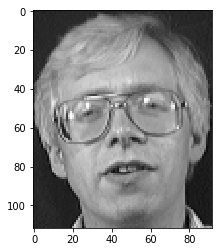

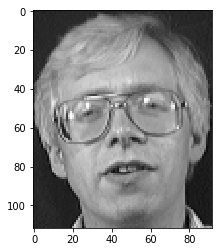

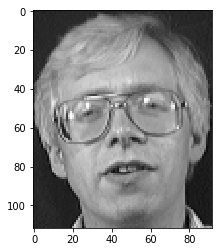

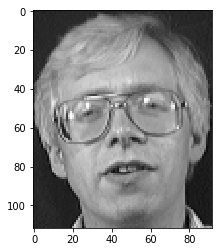

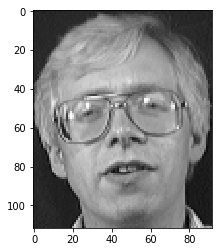

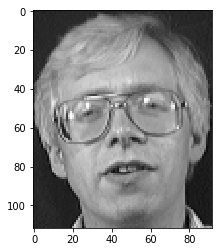

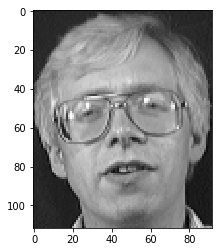

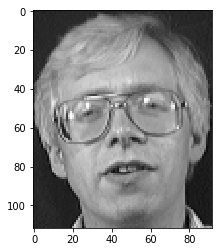

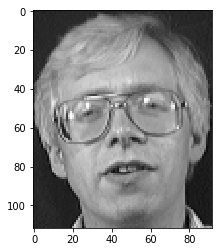

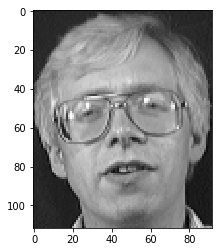

In [10]:
## Taken from the PPT
import os
import PIL import Image
import numpy as np

def read_images():
    path = 'att_faces'
    X=[]
    y=[]
    for i in range(40): #40 directories
        for j in range(10):
            img = Image.open(os.path.join(path,'s'+str(i+1),str(j+1)+'.pgm'))
            X.append(np.asarray(img,dtype=np.uint8).flatten())
            y.append(i)
        X = np.asarray(X)
        y = np.asarray(y)
        return X,y
            
        

### Feature extraction using PCA

1. Taking one random person, and plot all of its images (10 total) (give him a random name)
3. Using PCA over the data and move to 2D.
4. Reconstruct the first image in the database using the first K principal components. Show the result for K=5,10,20,50,100.


In [ ]:
## Enter your code here..

def PCA(data,dims_rescaled_data=2):
    m, n = data.shape
    
    data-=data.mean(axis=0)
    
    R=np.cov(data, rowvar=False)
    
    evals, evecs=linalg.eigh(R)
    
    idx=np.argsort(evals)[::-1]
    evecs=evecs[:,idx]
    evals=evals[idx]
    
    evecs=evecs[:, :dims_rescaled_data]
    
    return np.dot(evecs.T,data.T).T,evals,evecs


data = loadmat('C:/Users/Hai30/faces112x92.mat')
faces=data['faces']
target=data['target']

print(target)

ny,nx=112,92

sumA=np.zeros(10304)
mu=np.zeros(10304)

for image in range (0,len(faces)):
    for pixel in range(0, 10303):
        sumA[pixel]=sumA[pixel]+faces[image][pixel]

for pixel in range(0, 10303):
    mu[pixel]=(sumA[pixel]/len(faces))

normalizedFaces=np.zeros((400, 10304))

for image in range(0,len(faces)):
    for pixel in range (0,10303):
        normalizedFaces[image][pixel]=faces[image][pixel]-mu[pixel]

print("B")

Z, U, evls=PCA(np.dot(normalizedFaces, normalizedFaces.T),400)

print("seperator")
print(U)
plt.plot(U)
Plt.show()

for vec in range(0,10):
    plt.imshow(evls[vec].reshape(ny,nx))
    plt.show()

sortedU=U[:,0:len(U)]
sortedlamda=lamda[:len(lamda)]

print(PCA(normalizedFaces, 400))
PCA.fit(normalizedFaces)

print(U.shapes)
print("seperator")
print(lamda.shape)

print(sortedlamda)

x1=np.linspace(0, 10, 100)
plt.plot(x_trn,y_trn,'or',x_tst,y_tst,'or')
print()

print(np.linalg.eig(averagedPicture.reshape(ny,nx)))

print(faces)
print("seperator")
print(target)

### Classification

Finally, fit a classifier to the data (after the PCA phase): either logistic-regression or SVM.

We define the *accuracy score* as the percentage of faces correctly classified by the algorithm.

Try different values for each parameter you use. Use cross-validation to pick the best ones. 

Describe in graphs, scores and words all your findings.




In [ ]:

def shuffle(z,y):
    L = len(y)
    r = np.arange(0,L)
    r = np.random.permutation(r)
    
    z = z[r,:]
    y = y[r]
    return z,y

def classification(faces,target,k):
    
    z,u, evls=PCA(faces,k)
    z,target = shuffle(z,target)
    L = len(target)
    len_trn = int (L*4/5)
    
    z_trn = z[:len_trn]
    z_tst = z[len_trn:]
    target_trn = target[:len_trn]
    target_tst = target[len_trn:]
    
    kernel_k = 'rbf'
    gamma = 1e-8
    clf = SVC(C=100, kernel=kernel_k,gamma=gamma)
    clf.fit=(z_trn,target_trn)
    target_trn_hat = clf.predict(z_trn)
    target_tst_hat = clf.predict(z_tst)
    
    matrix_trn = np.zeros((40,40))
    matrix_tst = np.zeros((40,40))
    
    for i in range((len_trn)):
        matrix_trn[target_trn[i]-1,target_trn_hat[i]-1] +=1
        
    for i in range((L-len_trn)):
        matrix_tst[target_tst[i]-1,target_tst_hat[i]-1] +=1
        
    sum_diag_trn = np.trace(matrix_trn)
    sum_matrix_trn = np.sum(matrix_trn)
    per_success_t
    rn = (sum_diag_trn/sum_matrix_trn)*100
    print("the success rate for the data is: ", per_success_trn, "%")
    
    sum_diag_tst = np.trace(matrix_tst)
    sum_matrix_tst = np.sum(matrix_tst)
    per_success_tst = (sum_diag_tst/sum_matrix_tst)*100
    print("the success rate for the data is: ", per_success_tst, "%")
    
    print("the trian matrix is: ")
    plt.imshow(matrix_trn,interpolation='nearest' , cmap='gray')
    

classification(faces,target,10)

## Good luck!